# Project 1 How to Get a Good Start in Movies
## Team members: Jun Choi, Timothy Cleary, Olamide Olayinka

## Business Understanding:
* Microsoft is a multinational tech corporation known for producing software, electronics , computers and video games just to name a few.
* Microsoft now plans to venture into film and movie production.

### How to ensure only profitable movies that maximize return on investments come out of your new studio
* Figure out what genre you want your movie to be
* Who is the best suited director for that genre?
* What rating would best serve the director and movie to maximize profits?

---
# Import required packages and set parameters
---

In [1]:
import numpy as np

import pandas as pd
pd.options.mode.chained_assignment = None

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(style = 'darkgrid')

---
## Establishing the Master Dataset
---
### We selected the Rotten Tomatoes data to specifically target the genre, director and ratings in relation to their box office numbers
### Data limitations involved:
* Restricted to only the movies that were in the smaller Rotten Tomatoes data (1560) compared to more comprehensive one like The Numbers (26,517)
* Not having access to specific movie titles because of how Rotten Tomatoes has their data structured
---

In [2]:
#Reading in Rotten Tomatoes movie info data
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', '\t')
rt_movie_info.info() #inspect data present

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            1560 non-null   int64 
 1   synopsis      1498 non-null   object
 2   rating        1557 non-null   object
 3   genre         1552 non-null   object
 4   director      1361 non-null   object
 5   writer        1111 non-null   object
 6   theater_date  1201 non-null   object
 7   dvd_date      1201 non-null   object
 8   currency      340 non-null    object
 9   box_office    340 non-null    object
 10  runtime       1530 non-null   object
 11  studio        494 non-null    object
dtypes: int64(1), object(11)
memory usage: 146.4+ KB


In [3]:
#Drop null values from the box office column
rt_movie_info.dropna(subset = ['box_office'], inplace = True)

#Create a new dataframe
rt_new = rt_movie_info[['rating', 'box_office', 
                        'genre', 'director']].copy()

In [4]:
#Cleaning the new dataframe and dropping null values from the director column
rt_new.dropna(subset = ['director'], inplace = True)

#Remove values that would prevent us from casting data to int
rt_new['box_office'] = rt_new['box_office'].str.replace(',' , '')

#Cast box office to int from object
rt_new['box_office'] = rt_new['box_office'].astype(int)

In [5]:
#Save cleaned data as master dataframe
rt_new.to_csv('data/master.csv', encoding = 'utf-8', index = False)

In [6]:
#Read in cleaned master data
master = pd.read_csv('data/master.csv')

---
## Parsing the data to find the highest grossing directors along with their respective genre
---

In [7]:
#Create a dataframe with only director, box office and genre columns
d_earning = master[['director', 'box_office', 'genre']]

#Order the data set by box office in descending order
d_earning.sort_values('box_office', inplace = True, 
                      ascending = False, ignore_index = True)

#Create separate dataframe with top 20 earning directors to reduce the size of the data set
top20_d_earning = d_earning[:20]

#Use lambda function to display currency ticks properly instead of as scientific notation
#Main purpose is for visualization
top20_d_earning['box_office'] = top20_d_earning['box_office'].apply(lambda x: x/1000000)
top20_d_earning

,director,box_office,genre
0,Mel Gibson,368.000000,Drama
1,Peter Jackson,303.001229,Action and Adventure|Science Fiction and Fantasy
2,Sam Mendes,299.300000,Action and Adventure|Mystery and Suspense
3,Jay Roach,279.167575,Comedy
4,Chris Columbus,261.835892,Kids and Family|Science Fiction and Fantasy
5,Joel Zwick,241.250669,Comedy|Romance
6,Steven Spielberg,234.141872,Action and Adventure|Science Fiction and Fantasy
7,Peter Berg,227.946274,Action and Adventure|Comedy|Drama
8,Bryan Singer,214.813155,Action and Adventure|Science Fiction and Fantasy
9,Justin Lin,209.805005,Action and Adventure|Drama|Mystery and Suspense


---
## Creating the Visual
---

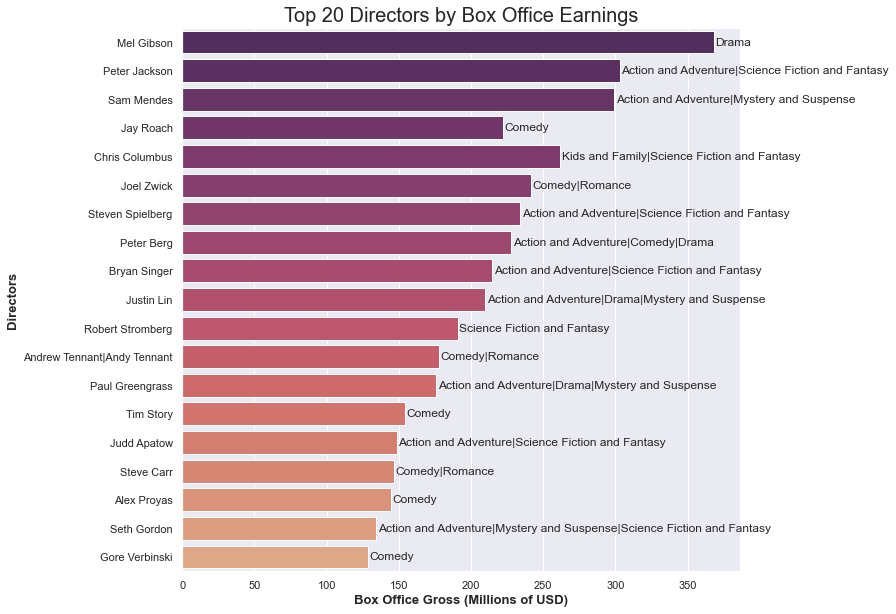

In [8]:
#Create plot to visualize the gathered data
fig, ax = plt.subplots(figsize = (10, 10))

#Plot top 20 data onto a bar plot
chart = sns.barplot(y = 'director', x = 'box_office', 
                    orient = 'h', palette = 'flare_r', data = top20_d_earning, ci = None)

#Setting title and label
chart.set_title('Top 20 Directors by Box Office Earnings', fontsize = 20)
chart.set_ylabel('Directors', fontsize = 13, weight = 'bold')
chart.set_xlabel('Box Office Gross (Millions of USD)', fontsize = 13, weight = 'bold');

#Loop to place genre labels on top of the respective bar plots
i = 0
for p in chart.patches:
    width = p.get_width()    # get bar length
    chart.text(width + 1,    # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2,    # get Y coordinate + X coordinate / 2
            '{}'.format(top20_d_earning['genre'][i]),    # set variable to display respective genre
            ha = 'left',    # horizontal alignment
            va = 'center')    # vertical alignment
    i += 1

## Findings
* When directors make movies in genres they specialize in they tend to perform well at the box office
* Franchises are exceptions to many genres performing well for many of the action and adventure genres
* Comedy may not have the highest box office, but they dominate the top 20 along with action and adventure

#### Recommendation:
* Mel Gibson for a drama movie and Jay Roach for a comedy. These genres do not rely on a previously established franchise unlike a majority of the Action and Adventure genres. In addition to this both drama and comedy are easy genres to break into as they appeal to a wide range of people and have a lot of flexibility.


---
## Filtering the data for the total box office gross categorized by the movie rating
---

In [9]:
#Isolate rating and box office columns
rating_gross = master[['rating', 'box_office']]

In [10]:
#Drop ratings that do not contribute to a majority of movie ratings
rating_gross.drop(rating_gross[rating_gross['rating'] == 'NR'].index, inplace = True)
rating_gross.drop(rating_gross[rating_gross['rating'] == 'NC17'].index, inplace = True)
rating_gross.drop(rating_gross[rating_gross['rating'] == 'G'].index, inplace = True)

In [11]:
#Use lambda function to display currency ticks properly instead of as scientific notation
rating_gross['box_office'] = rating_gross['box_office'].apply(lambda x: x/1000000)

---
## Creating the Visual
---

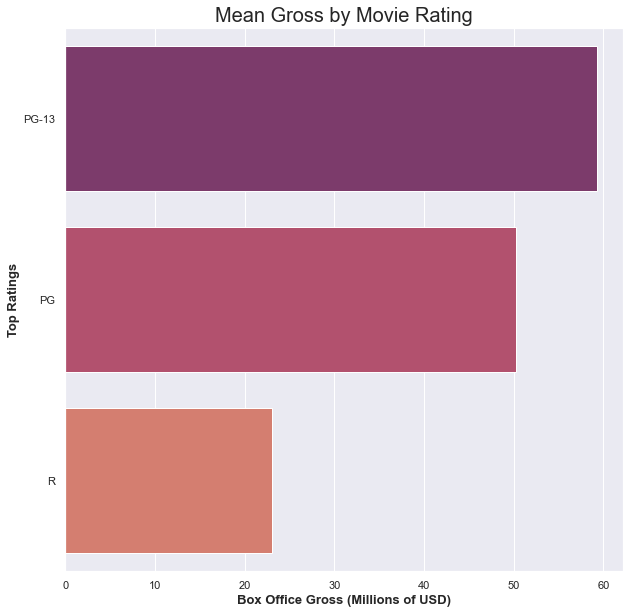

In [12]:
#Create plot to visualize the gathered data
fig, ax = plt.subplots(figsize=(10, 10))

#Group by box office, calculate sum of box office and sort by box office
aggregation_functions1 = {'box_office': 'mean'}
df1 = rating_gross.groupby(rating_gross['rating']).aggregate(aggregation_functions1).reset_index()
df1.sort_values('box_office', inplace = True, 
               ascending = False, ignore_index = True)

#Plot using box office and rating 
sns.barplot(x = "box_office", y = "rating", 
              data = df1, palette = 'flare_r', ci = None)

#Setting title and labels
ax.set_xlabel('Box Office Gross (Millions of USD)', fontsize = 13, weight = 'bold')
ax.set_ylabel('Top Ratings', fontsize = 13, weight = 'bold')
ax.set_title('Mean Gross by Movie Rating', fontsize = 20);

## Findings
* PG-13 rated movies are the most common and have a consistent variation in box office numbers
* R rated movies have more consistency at the box office and seem to perform not as well
* PG movies are the most sparse and have a wide variance in how they perform

#### Recommendation:
* PG-13 rated movies have a higher aptitude to make more money at the box office. It has the widest reach in terms of audience and dominates most of the market. This means that many directors have more experience in the PG-13 field in comparison to the others.

---
## Aggregating box office numbers according to genre 
---

In [13]:
#Create dataframe with genre and box office
g_gross = master[['genre', 'box_office']]

#Group by box office, calculate sum of box office and sort by box office
aggregation_functions = {'box_office': 'sum'}
df = g_gross.groupby(g_gross['genre']).aggregate(aggregation_functions).reset_index()
df.sort_values('box_office', inplace = True, 
               ascending = False, ignore_index = True)

#Create dataframe of top 20 by genre
g_gross_20 = df[:20]
g_gross_20['box_office'] = g_gross_20['box_office'].apply(lambda x: x/1000000)

---
## Creating the Visual
---

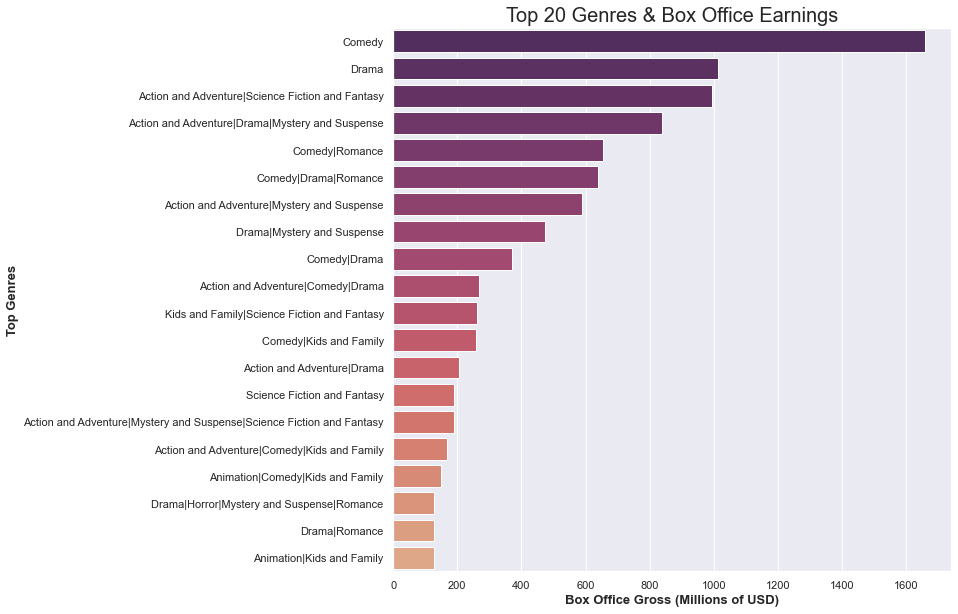

In [14]:
#Create plot to visualize the gathered data
fig, ax = plt.subplots(figsize = (10, 10))

#Plot using top 20 genres and the respective box office gross values
sns.barplot(y = g_gross_20['genre'].head(20), x = g_gross_20['box_office'], 
            orient = 'h', palette = 'flare_r')

#Setting title and labels
ax.set_title('Top 20 Genres & Box Office Earnings', fontsize = 20)
ax.set_xlabel('Box Office Gross (Millions of USD)', fontsize = 13, weight = 'bold')
ax.set_ylabel('Top Genres', fontsize = 13, weight = 'bold');

## Findings
* Comedy and Drama are unsurprisingly the two highest earning genres.
* Comedy appears in 8 of the top 20 genres with drama appearing in 9.

#### Recommendation:
* Comedy and Drama are the best categories to enter, they the most profitable and the easiest way to enter the market. Animations should be avoided as should kids and family. They not only limit the audience you can reach it also is not nearly as profitable as the other genre options.